In [52]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# Путь к файлам
ds1 = pd.read_csv('data/S07-hw-dataset-01.csv')
ds2 = pd.read_csv('data/S07-hw-dataset-02.csv')
ds3 = pd.read_csv('data/S07-hw-dataset-03.csv')
ds1.head() 

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [54]:
# EDA для Dataset A
print(ds1.shape)  # Размер
ds1.info()  # Типы, пропуски
ds1.describe()  # Статистика
# Пропуски
print(ds1.isnull().sum())

(12000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB
sample_id    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
dtype: int64


In [55]:
# EDA для Dataset B
print(ds2.shape)  # Размер
ds2.info()  # Типы, пропуски
ds2.describe()  # Статистика
# Пропуски
print(ds2.isnull().sum())

(8000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB
sample_id    0
x1           0
x2           0
z_noise      0
dtype: int64


In [56]:
# EDA для Dataset C
print(ds3.shape)  # Размер
ds3.info()  # Типы, пропуски
ds3.describe()  # Статистика
# Пропуски
print(ds3.isnull().sum())

(15000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB
sample_id    0
x1           0
x2           0
f_corr       0
f_noise      0
dtype: int64


In [57]:
# Препроцессинг для Dataset A
scaler = StandardScaler()
ds1_scaled = scaler.fit_transform(ds1.drop(columns=['sample_id']))
ds1_scaled = pd.DataFrame(ds1_scaled, columns=ds1.columns[1:])
ds1_scaled.describe()

,f01,f02,f03,f04,f05,f06,f07,f08
count,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04
mean,-7.105427e-18,-4.056015e-17,-7.105427e-18,-1.657933e-17,-2.723747e-17,-3.552714e-17,-2.250052e-17,-5.921189e-18
std,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,-1.587805e+00,-1.842482e+00,-2.734501e+00,-2.126283e+00,-1.662143e+00,-1.452210e+00,-3.613287e+00,-4.350886e+00
25%,-6.399128e-01,-9.770177e-01,1.935994e-01,-6.759285e-01,-7.033384e-01,-6.604444e-01,-6.707207e-01,-6.739748e-01
50%,-4.035542e-01,5.751405e-01,3.801565e-01,4.133173e-01,9.044044e-02,-4.797279e-01,-1.028258e-02,-3.841803e-03
75%,2.677134e-01,8.418290e-01,5.534115e-01,6.133506e-01,5.882440e-01,9.270276e-02,6.665530e-01,6.630577e-01
max,2.435850e+00,1.531914e+00,1.466893e+00,1.406729e+00,1.979437e+00,2.736895e+00,3.583315e+00,4.090602e+00


In [58]:
# Препроцессинг для Dataset B
scaler = StandardScaler()
ds2_scaled = scaler.fit_transform(ds2.drop(columns=['sample_id']))
ds2_scaled = pd.DataFrame(ds2_scaled, columns=ds2.columns[1:])
ds2_scaled.describe()

,x1,x2,z_noise
count,8.000000e+03,8.000000e+03,8.000000e+03
mean,-5.329071e-18,5.151435e-17,-8.437695e-18
std,1.000063e+00,1.000063e+00,1.000063e+00
min,-3.105735e+00,-4.132301e+00,-4.219543e+00
25%,-6.233874e-01,-7.290458e-01,-6.795753e-01
50%,1.234532e-02,-3.037321e-05,2.719051e-03
75%,6.349170e-01,7.319777e-01,6.848224e-01
max,2.626684e+00,4.153550e+00,3.624659e+00


In [59]:
# Препроцессинг для Dataset C
scaler = StandardScaler()
ds3_scaled = scaler.fit_transform(ds3.drop(columns=['sample_id']))
ds3_scaled = pd.DataFrame(ds3_scaled, columns=ds3.columns[1:])
ds3_scaled.describe()

,x1,x2,f_corr,f_noise
count,15000.000000,1.500000e+04,15000.000000,1.500000e+04
mean,0.000000,-3.031649e-17,0.000000,-1.136868e-17
std,1.000033,1.000033e+00,1.000033,1.000033e+00
min,-2.448002,-2.338245e+00,-3.545710,-3.494732e+00
25%,-0.659465,-7.854902e-01,-0.770606,-6.799131e-01
50%,-0.126750,1.692963e-01,0.054728,-1.010405e-02
75%,0.694510,8.355279e-01,0.769623,6.786514e-01
max,3.257991,2.810108e+00,3.649167,4.506233e+00


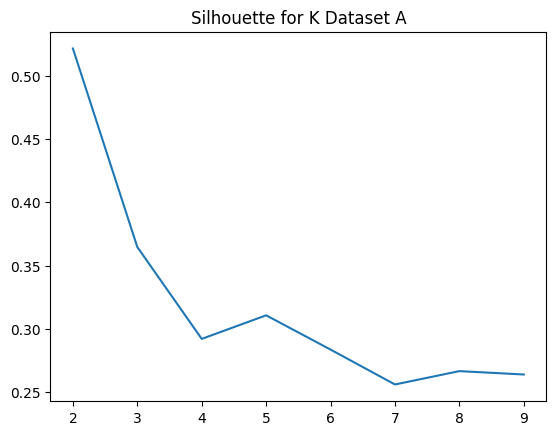

In [60]:
# KMeans для Dataset A — подбор k
silhouettes = []  
for k in range(2, 10):  
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(ds1_scaled)  
    sil = silhouette_score(ds1_scaled, kmeans.labels_)  
    silhouettes.append(sil)  
plt.plot(range(2,10), silhouettes)  
plt.title('Silhouette for K Dataset A')  
plt.savefig('artifacts/figures/sil_a.png')  
plt.show()  

In [61]:
# Запуск KMeans для Dataset A с лучшим k
kmeans_a = KMeans(n_clusters=3, random_state=42)  
kmeans_a.fit(ds1_scaled)  
labels_a = kmeans_a.labels_  

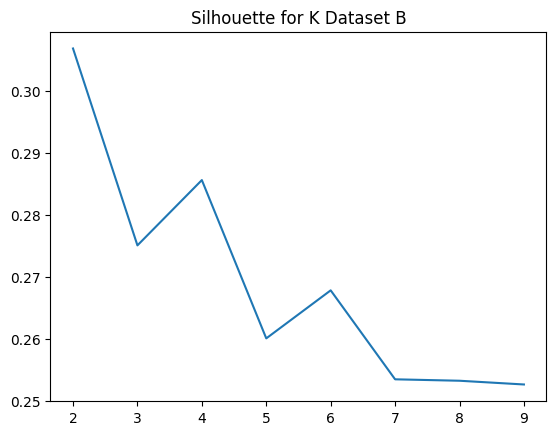

In [62]:
# KMeans для Dataset B — подбор k
silhouettes = []  
for k in range(2, 10):  
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(ds2_scaled)  
    sil = silhouette_score(ds2_scaled, kmeans.labels_)  
    silhouettes.append(sil) 
plt.plot(range(2,10), silhouettes)  
plt.title('Silhouette for K Dataset B')  
plt.savefig('artifacts/figures/sil_b.png')  
plt.show()  

In [63]:
# Запуск KMeans для Dataset B с лучшим k
kmeans_b = KMeans(n_clusters=3, random_state=42)  
kmeans_b.fit(ds2_scaled)  
labels_b = kmeans_b.labels_  

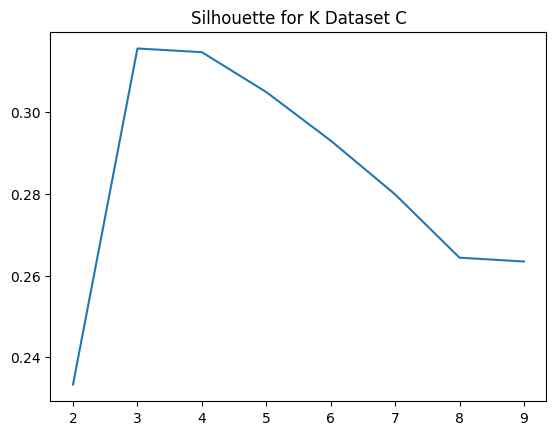

In [64]:
# KMeans для Dataset C — подбор k
silhouettes = []  
for k in range(2, 10):  
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(ds3_scaled)  
    sil = silhouette_score(ds3_scaled, kmeans.labels_)  
    silhouettes.append(sil)  
plt.plot(range(2,10), silhouettes)  
plt.title('Silhouette for K Dataset C')  
plt.savefig('artifacts/figures/sil_c.png')  
plt.show()  

In [65]:
# Запуск KMeans для Dataset C с лучшим k
kmeans_c = KMeans(n_clusters=3, random_state=42)  
kmeans_c.fit(ds3_scaled)  
labels_c = kmeans_c.labels_  

In [66]:
# DBSCAN для Dataset A
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_db = dbscan.fit_predict(ds1_scaled)
sil_db = silhouette_score(ds1_scaled, labels_db)
print(sil_db)

0.25673643555803094


In [67]:
# DBSCAN для Dataset B
dbscan_b = DBSCAN(eps=0.5, min_samples=5)  
labels_db_b = dbscan_b.fit_predict(ds2_scaled)  
sil_db_b = silhouette_score(ds2_scaled, labels_db_b) 
print(sil_db_b)

-0.0851996311903564


In [68]:
# DBSCAN для Dataset C
dbscan_c = DBSCAN(eps=0.5, min_samples=5)  
labels_db_c = dbscan_c.fit_predict(ds3_scaled)  
sil_db_c = silhouette_score(ds3_scaled, labels_db_c)  
print(sil_db_c)

-0.11289920203319767


In [69]:
# Метрики для Dataset A (KMeans)
sil_k_a = silhouette_score(ds1_scaled, labels_a)
db_k_a = davies_bouldin_score(ds1_scaled, labels_a)
ch_k_a = calinski_harabasz_score(ds1_scaled, labels_a)
print(f'KMeans A: Sil {sil_k_a}, DB {db_k_a}, CH {ch_k_a}')

# Метрики для Dataset A (DBSCAN) 
dbscan_a = DBSCAN(eps=0.5, min_samples=5)  
labels_db_a = dbscan_a.fit_predict(ds1_scaled)  
sil_db_a = silhouette_score(ds1_scaled, labels_db_a)
db_db_a = davies_bouldin_score(ds1_scaled, labels_db_a)
ch_db_a = calinski_harabasz_score(ds1_scaled, labels_db_a)
print(f'DBSCAN A: Sil {sil_db_a}, DB {db_db_a}, CH {ch_db_a}')

# Метрики для Dataset B (KMeans)
sil_k_b = silhouette_score(ds2_scaled, labels_b)
db_k_b = davies_bouldin_score(ds2_scaled, labels_b)
ch_k_b = calinski_harabasz_score(ds2_scaled, labels_b)
print(f'KMeans B: Sil {sil_k_b}, DB {db_k_b}, CH {ch_k_b}')

# Метрики для Dataset B (DBSCAN)
dbscan_b = DBSCAN(eps=0.5, min_samples=5)  
labels_db_b = dbscan_b.fit_predict(ds2_scaled)  
sil_db_b = silhouette_score(ds2_scaled, labels_db_b)
db_db_b = davies_bouldin_score(ds2_scaled, labels_db_b)
ch_db_b = calinski_harabasz_score(ds2_scaled, labels_db_b)
print(f'DBSCAN B: Sil {sil_db_b}, DB {db_db_b}, CH {ch_db_b}')

# Метрики для Dataset C (KMeans)
sil_k_c = silhouette_score(ds3_scaled, labels_c)
db_k_c = davies_bouldin_score(ds3_scaled, labels_c)
ch_k_c = calinski_harabasz_score(ds3_scaled, labels_c)
print(f'KMeans C: Sil {sil_k_c}, DB {db_k_c}, CH {ch_k_c}')

# Метрики для Dataset C (DBSCAN)
dbscan_c = DBSCAN(eps=0.5, min_samples=5)  
labels_db_c = dbscan_c.fit_predict(ds3_scaled) 
sil_db_c = silhouette_score(ds3_scaled, labels_db_c)
db_db_c = davies_bouldin_score(ds3_scaled, labels_db_c)
ch_db_c = calinski_harabasz_score(ds3_scaled, labels_db_c)
print(f'DBSCAN C: Sil {sil_db_c}, DB {db_db_c}, CH {ch_db_c}')

KMeans A: Sil 0.3646600260306961, DB 1.1694300162128215, CH 10331.43184313266
DBSCAN A: Sil 0.25673643555803094, DB 1.5870277602584761, CH 3210.2734068998398
KMeans B: Sil 0.2750789836991554, DB 1.22516372441342, CH 3077.719472591118
DBSCAN B: Sil -0.0851996311903564, DB 1.9856490304539456, CH 43.51028289589608
KMeans C: Sil 0.31553248183109267, DB 1.1577832240211114, CH 6957.158106946778
DBSCAN C: Sil -0.11289920203319767, DB 17.51056038317382, CH 9.49789936402979


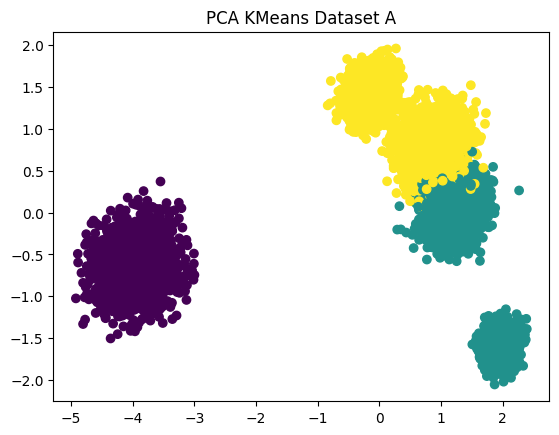

In [70]:
# PCA для Dataset A (KMeans)
pca = PCA(n_components=2)  
pca_data = pca.fit_transform(ds1_scaled)  
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_a)  
plt.title('PCA KMeans Dataset A')  
plt.savefig('artifacts/figures/pca_a_kmeans.png')  
plt.show()  

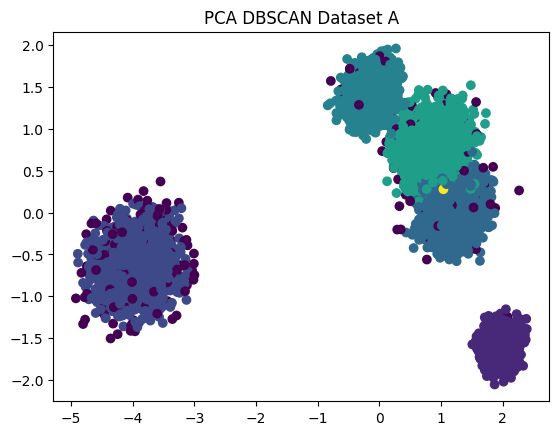

In [71]:
# PCA для Dataset A (DBSCAN)
pca = PCA(n_components=2)  
pca_data = pca.fit_transform(ds1_scaled)  
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_db_a)  
plt.title('PCA DBSCAN Dataset A') 
plt.savefig('artifacts/figures/pca_a_dbscan.png')  
plt.show()  

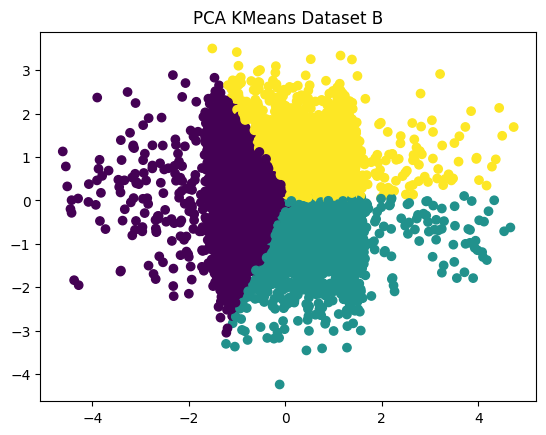

In [72]:
# PCA для Dataset B (KMeans)
pca = PCA(n_components=2)  
pca_data = pca.fit_transform(ds2_scaled)  
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_b)  
plt.title('PCA KMeans Dataset B')  
plt.savefig('artifacts/figures/pca_b_kmeans.png')  
plt.show()  

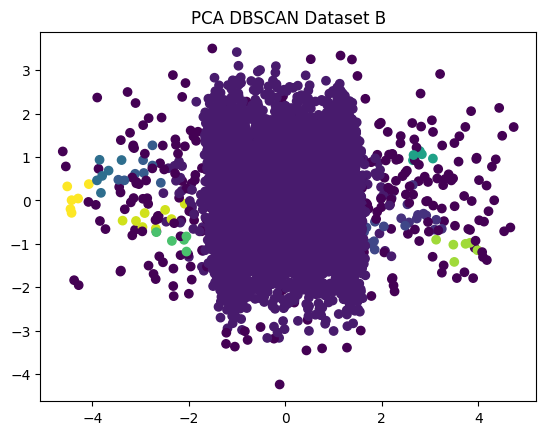

In [73]:
# PCA для Dataset B (DBSCAN)
pca = PCA(n_components=2)  
pca_data = pca.fit_transform(ds2_scaled)  
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_db_b) 
plt.title('PCA DBSCAN Dataset B')  
plt.savefig('artifacts/figures/pca_b_dbscan.png')  
plt.show()  

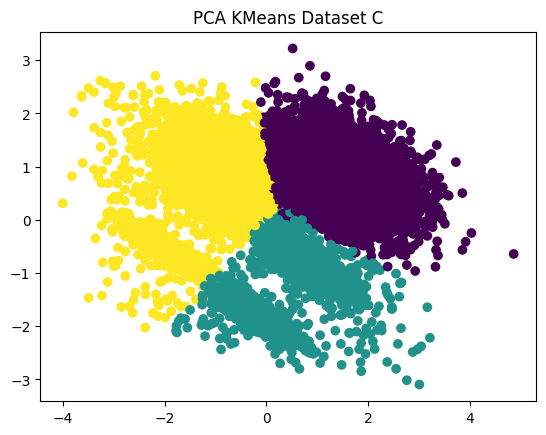

In [74]:
# PCA для Dataset C (KMeans)
pca = PCA(n_components=2)  
pca_data = pca.fit_transform(ds3_scaled)  
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_c)  
plt.title('PCA KMeans Dataset C')  
plt.savefig('artifacts/figures/pca_c_kmeans.png')  
plt.show()  

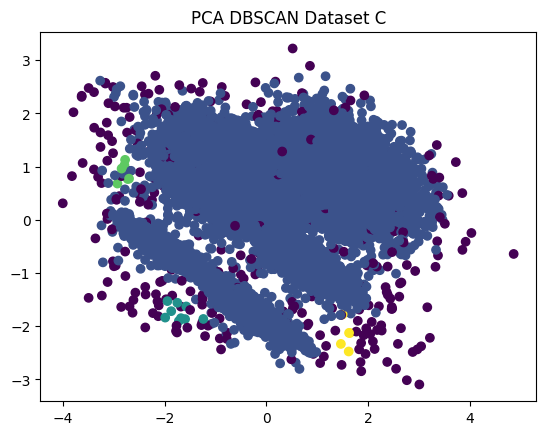

In [75]:
# PCA для Dataset C (DBSCAN)
pca = PCA(n_components=2)  
pca_data = pca.fit_transform(ds3_scaled)  
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_db_c)  
plt.title('PCA DBSCAN Dataset C')  
plt.savefig('artifacts/figures/pca_c_dbscan.png')  
plt.show()  

In [76]:
# Устойчивость для Dataset A (KMeans)
scores = []  
for seed in [42,1,2,3,4]:  
    kmeans = KMeans(n_clusters=3, random_state=seed)  
    kmeans.fit(ds1_scaled)  
    sil = silhouette_score(ds1_scaled, kmeans.labels_)  
    scores.append(sil)  
print(scores)  

[0.3646600260306961, 0.39675785208949865, 0.39675785208949865, 0.3646600260306961, 0.3646600260306961]


In [77]:
# Интерпретация для Dataset A (KMeans)
ds1['cluster'] = labels_a  
ds1.groupby('cluster').mean()  

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
cluster,,,,,,,,,
0,6088.081667,17.540764,60.096197,-1.196370,-102.674372,10.074911,29.255953,-0.568951,-0.008659
1,6017.153285,-6.991496,-52.328576,0.067979,43.783297,-5.011476,-4.198111,0.799996,0.015523
2,5937.638710,-7.839792,69.922642,-0.024855,-13.098111,-0.507465,-8.018457,-0.429931,0.007909


In [78]:
# Интерпретация для Dataset B (KMeans)
ds2['cluster'] = labels_b  
ds2.groupby('cluster').mean() 

,sample_id,x1,x2,z_noise
cluster,,,,
0,3983.083066,1.233144,-0.240505,0.262301
1,4017.580562,-0.017434,0.637377,-6.979356
2,4005.919698,-0.159548,0.567234,7.160995


In [79]:
# Интерпретация для Dataset C (KMeans)
ds3['cluster'] = labels_c  
ds3.groupby('cluster').mean()  

,sample_id,x1,x2,f_corr,f_noise
cluster,,,,,
0,10819.605270,6.595694,5.883399,1.169314,-0.072434
1,9858.307363,2.610427,-3.584087,1.338032,-0.006847
2,3792.121571,-2.865216,1.780306,-1.195912,-0.016492
